### Import the required libraries

In [47]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

### Load the dataset

In [5]:
df = pd.read_csv('marketing_campaign (1).csv', sep='\t')

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Exploratory Data Analysis

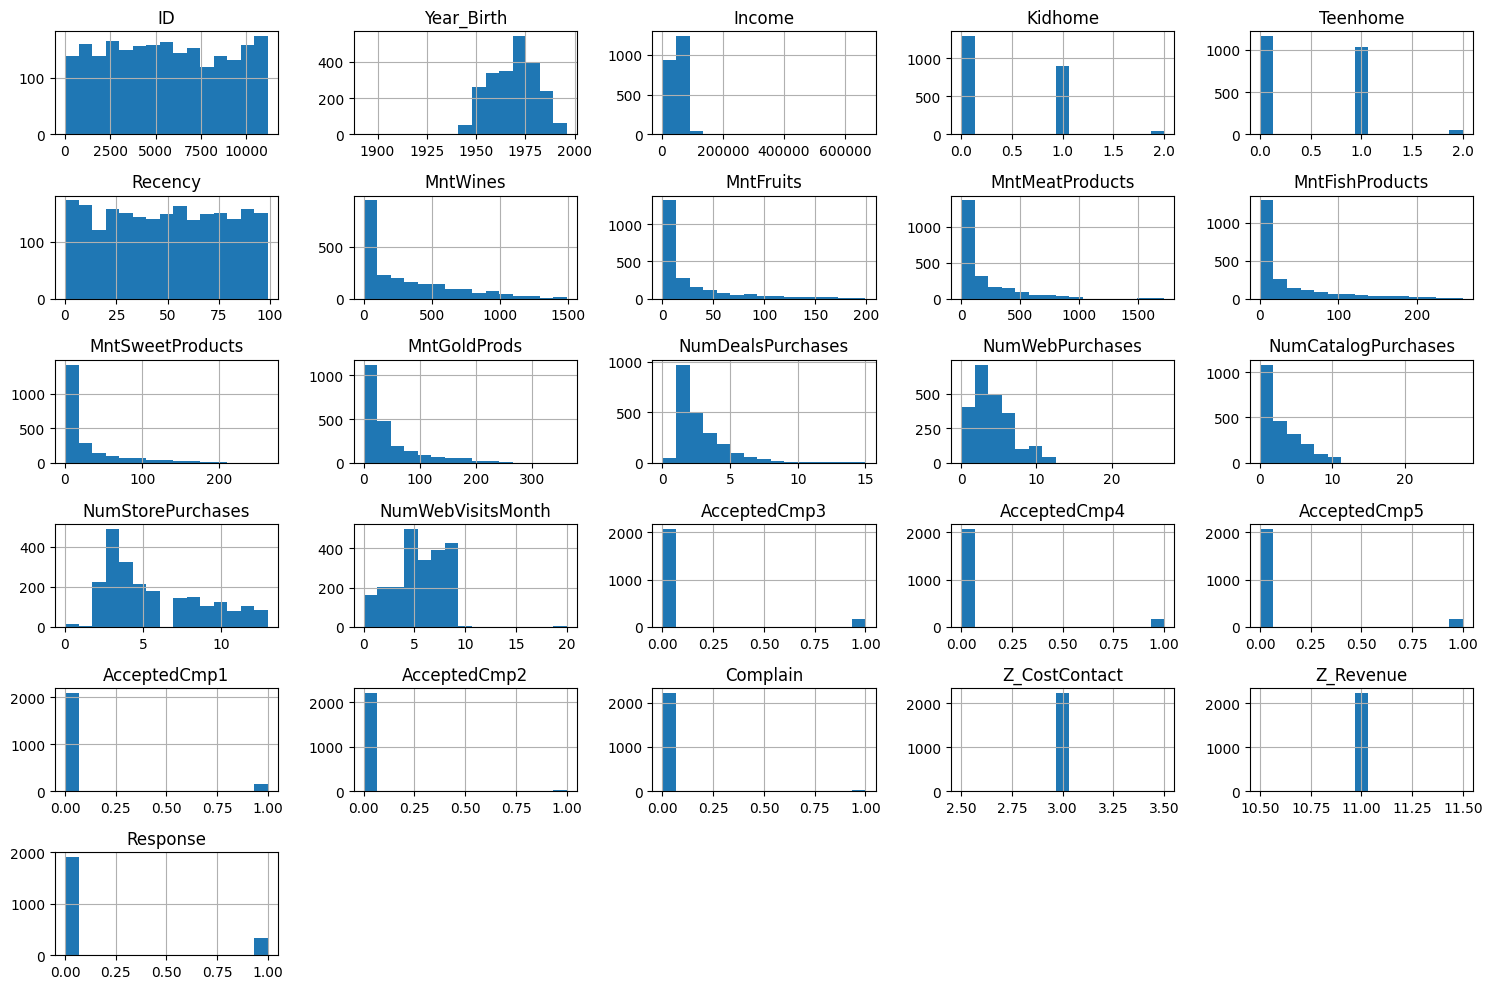

In [10]:
# Distribution of numeric features
df.select_dtypes(include=np.number).hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

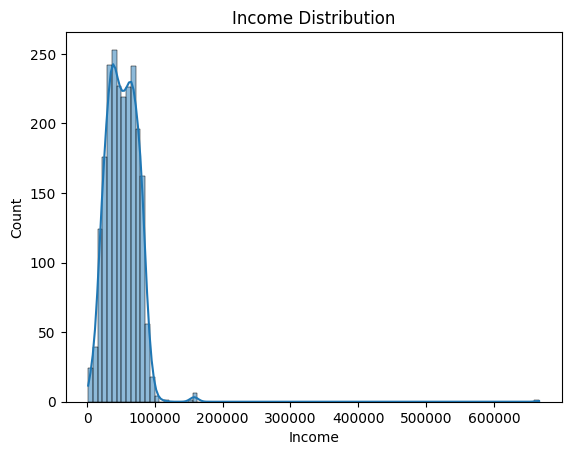

In [11]:
# Income distribution
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution")
plt.show()

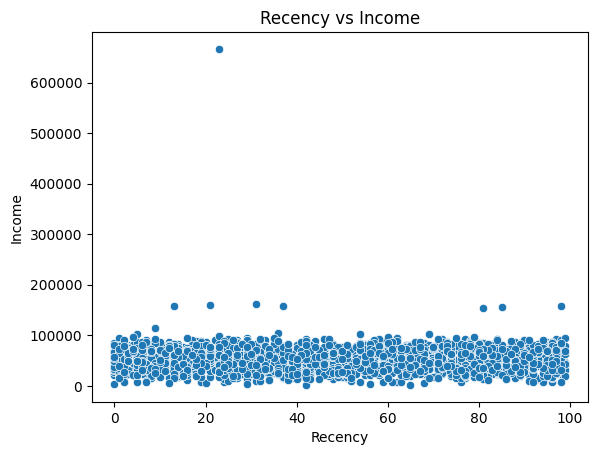

In [12]:
# Recency vs Income
sns.scatterplot(x='Recency', y='Income', data=df)
plt.title("Recency vs Income")
plt.show()

### Data Cleaning

#### Drop Irrelevant Columns

Columns like ID, Z_CostContact, and Z_Revenue don’t provide information for segmentation — they’re constants or identifiers.

In [13]:
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

#### Handle Missing Income Values

In [18]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Feature Engineering

In [19]:
#Total Children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [20]:
#Customer Tenure (Days since joining)
df['Customer_For'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [21]:
# Total Spending
df['TotalSpend'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

In [24]:
df['Age'] = 2024 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2240 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

#### Drop irrelevant columns 

In [27]:
df = df.drop([
    'Dt_Customer', 
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 
    'Response', 'Complain'
], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [30]:
categorical_features = ['Education', 'Marital_Status']

numerical_features = [col for col in df.columns 
                      if col not in categorical_features]

#### Define the Transformers

In [31]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

In [32]:
df_preprocessed = preprocessor.fit_transform(df)

In [33]:
# Get feature names after encoding
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
final_columns = numerical_features + list(encoded_cols)

# Create a DataFrame
df_scaled = pd.DataFrame(df_preprocessed, columns=final_columns)

In [34]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   float64
 2   Teenhome                 2240 non-null   float64
 3   Recency                  2240 non-null   float64
 4   MntWines                 2240 non-null   float64
 5   MntFruits                2240 non-null   float64
 6   MntMeatProducts          2240 non-null   float64
 7   MntFishProducts          2240 non-null   float64
 8   MntSweetProducts         2240 non-null   float64
 9   MntGoldProds             2240 non-null   float64
 10  NumDealsPurchases        2240 non-null   float64
 11  NumWebPurchases          2240 non-null   float64
 12  NumCatalogPurchases      2240 non-null   float64
 13  NumStorePurchases        2240 non-null   float64
 14  NumWebVisitsMonth       

In [35]:
df_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,TotalChildren,Customer_For,TotalSpend,Age,Education_Master,Education_PhD,Education_Undergraduate,Marital_Status_Single
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,-0.550785,0.693904,-1.264505,1.531185,1.679417,0.985345,0.0,0.0,0.0,1.0
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-1.166125,-0.130463,1.396361,-1.190545,-0.961275,1.235733,0.0,0.0,0.0,1.0
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,1.295237,-0.542647,-1.264505,-0.205773,0.282673,0.317643,0.0,0.0,0.0,0.0
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.550785,0.281720,0.065928,-1.061881,-0.918094,-1.268149,0.0,0.0,0.0,0.0
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.064556,-0.130463,0.065928,-0.953012,-0.305254,-1.017761,0.0,1.0,0.0,0.0


### K-Means Clustering

#### Find the Optimal Number of Clusters

`Elbow Method` → measures inertia (within-cluster sum of squares)

`Silhouette Score` → measures how well-separated the clusters are

In [36]:
inertia = []
silhouette = []
K = range(2, 11)  # Test clusters between 2 and 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))


#### Visualize the Elbow and Silhouette Scores

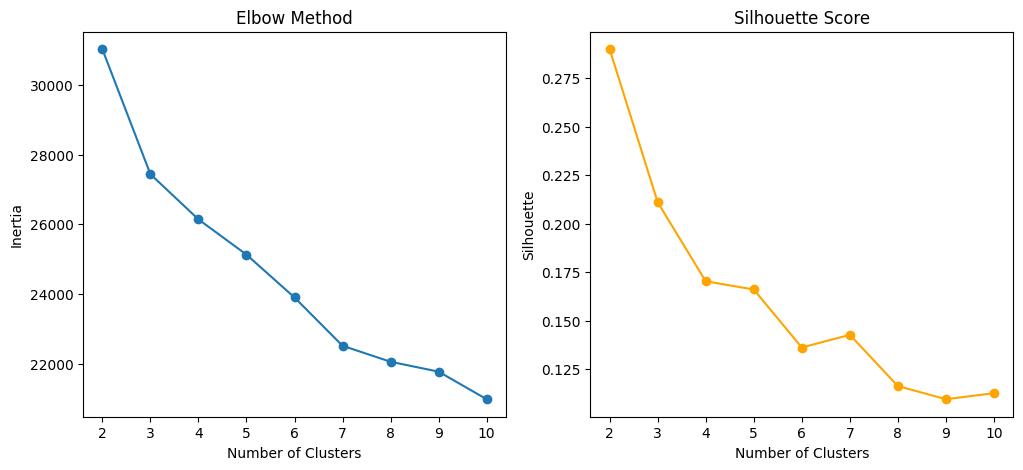

In [37]:
plt.figure(figsize=(12,5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')

plt.show()


Elbow Method
- The inertia (within-cluster sum of squares) decreases as clusters increase.
- The "bend" or elbow is around `k=3` or `k=4` after that, the curve flattens, meaning adding more clusters doesn’t reduce inertia much.

Silhouette Score
- The score is highest at `k=2` (≈0.29), but that’s usually too simple and might not capture customer diversity well.
- The next reasonable score is at `k=3` (~0.21) — beyond that, the score keeps dropping.

Best balance is `k=3` → good cluster separation and matches the elbow bend.

In [39]:
#KMeans with k=3 on scaled data
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Attach cluster labels both to the scaled DF and to your original df
df_scaled['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels

print("Cluster counts:")
print(df['Cluster'].value_counts())

Cluster counts:
Cluster
0    1050
1     597
2     593
Name: count, dtype: int64


In [40]:
# Profile clusters using original units for interpretability
numeric_cols_for_profile = [
    'Income', 'TotalSpend', 'Recency', 'Age', 'Customer_For',
    'NumWebPurchases','NumStorePurchases','NumCatalogPurchases','NumDealsPurchases'
]
cluster_numeric_profile = df.groupby('Cluster')[numeric_cols_for_profile].mean().round(2)
print("\nNumeric cluster profile (means):")
display(cluster_numeric_profile)


Numeric cluster profile (means):


,Income,TotalSpend,Recency,Age,Customer_For,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases
Cluster,,,,,,,,,
0,35280.87,99.23,49.32,52.50,320.29,2.13,3.23,0.56,2.06
1,58027.93,736.44,48.12,59.45,409.43,6.39,7.76,3.10,3.79
2,76434.20,1371.24,49.73,55.67,356.31,5.23,8.35,5.94,1.32


In [41]:
# Categorical dominant values per cluster (mode)
cluster_cat_profile = df.groupby('Cluster')[categorical_features + ['Marital_Status']].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
print("\nCategorical / dominant values per cluster:")
display(cluster_cat_profile)


Categorical / dominant values per cluster:


,Education,Marital_Status,Marital_Status
Cluster,,,
0,Graduation,Married,Married
1,Graduation,Married,Married
2,Graduation,Married,Married


In [42]:
# Add cluster sizes and % of population
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_summary = pd.DataFrame({
    'size': cluster_sizes,
    'pct': (cluster_sizes / len(df) * 100).round(2)
})
print("\nCluster sizes:")
display(cluster_summary)


Cluster sizes:


,size,pct
Cluster,,
0,1050,46.88
1,597,26.65
2,593,26.47


In [43]:
centers = df.groupby('Cluster')[['Income','TotalSpend']].mean()
print("\nCluster centers (Income, TotalSpend):")
display(centers)


Cluster centers (Income, TotalSpend):


,Income,TotalSpend
Cluster,,
0,35280.870476,99.226667
1,58027.927136,736.440536
2,76434.196459,1371.239460


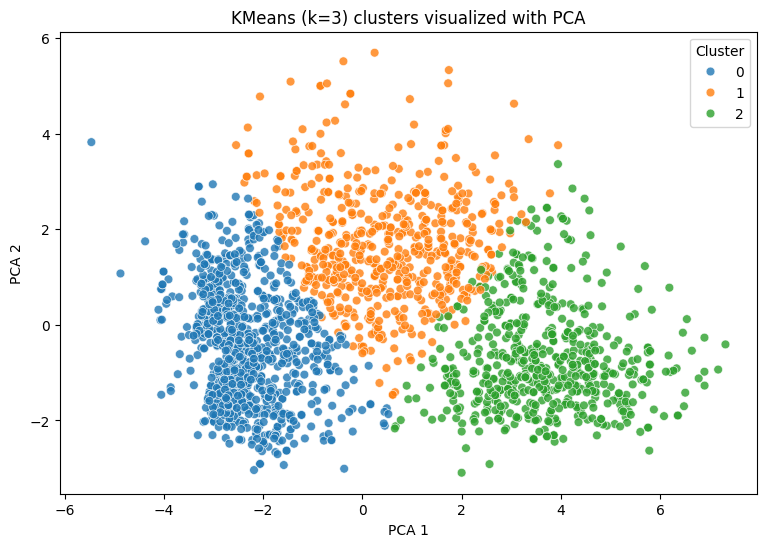

In [44]:
# Visualize clusters using PCA (2D)
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

plt.figure(figsize=(9,6))
sns.scatterplot(x=pca_coords[:,0], y=pca_coords[:,1],
                hue=df['Cluster'], palette='tab10', s=40, alpha=0.8)
plt.title(f'KMeans (k={k}) clusters visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

#### Compute cluster summaries

In [45]:
# --- Cluster profiling for interpretation ---

profile = df.groupby('Cluster').agg({
    'Income': 'mean',
    'TotalSpend': 'mean',
    'Age': 'mean',
    'Recency': 'mean',
    'Customer_For': 'mean'
}).round(2)

print("Cluster profile summary:")
display(profile)

# Automatically assign heuristic labels
labels = {}
for cluster, row in profile.iterrows():
    if row['Income'] > profile['Income'].mean() and row['TotalSpend'] > profile['TotalSpend'].mean():
        labels[cluster] = "High-Value Customers"
    elif row['Income'] < profile['Income'].mean() and row['TotalSpend'] < profile['TotalSpend'].mean():
        labels[cluster] = "Budget Customers"
    else:
        labels[cluster] = "Moderate/Occasional Customers"

df['ClusterLabel'] = df['Cluster'].map(labels)

print("\nAssigned cluster labels:")
print(df[['Cluster','ClusterLabel']].drop_duplicates().sort_values('Cluster'))


Cluster profile summary:


,Income,TotalSpend,Age,Recency,Customer_For
Cluster,,,,,
0,35280.87,99.23,52.50,49.32,320.29
1,58027.93,736.44,59.45,48.12,409.43
2,76434.20,1371.24,55.67,49.73,356.31



Assigned cluster labels:
   Cluster          ClusterLabel
1        0      Budget Customers
5        1  High-Value Customers
0        2  High-Value Customers


### Hierarchical Clustering

#### Agglomerative Clustering

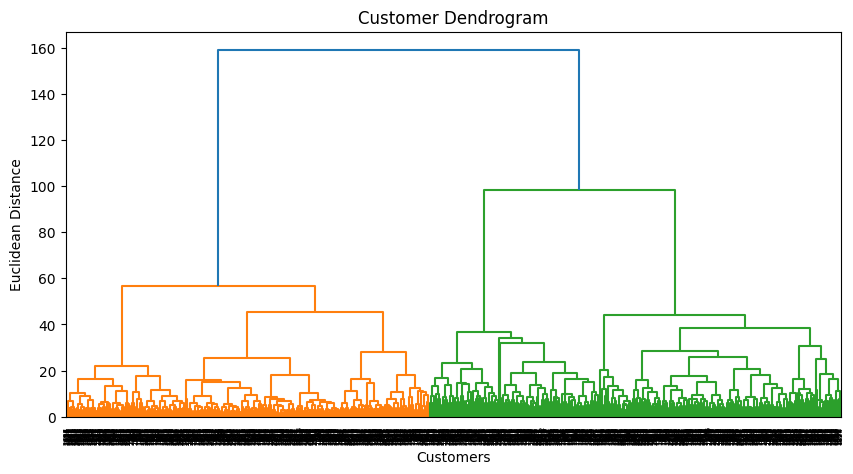

In [49]:
# Dendrogram to find possible cluster cut
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

#### Fit the Model

In [51]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(df_scaled)

# Check cluster distribution
print(df['HC_Cluster'].value_counts())

HC_Cluster
0    1053
1     697
2     490
Name: count, dtype: int64


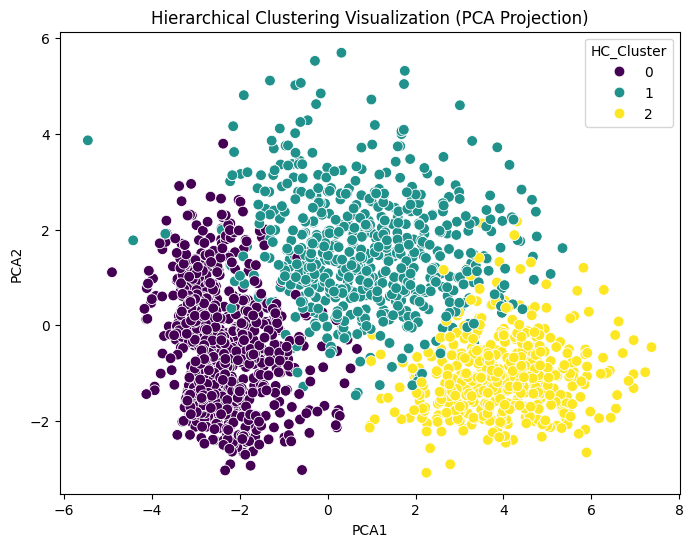

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['HC_Cluster'] = df['HC_Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='HC_Cluster', data=pca_df, palette='viridis', s=60)
plt.title('Hierarchical Clustering Visualization (PCA Projection)')
plt.show()


### DBSCAN

- Unlike K-Means or Hierarchical Clustering, DBSCAN doesn’t require specifying the number of clusters beforehand.
- Instead, it groups together points that are close in density and marks outliers as noise.

In [54]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5) 
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Check cluster labels
print(df['DBSCAN_Cluster'].value_counts())

# Inspect unique labels (-1 represents noise)
print("Unique clusters:", df['DBSCAN_Cluster'].unique())

DBSCAN_Cluster
-1     1581
 1      379
 0      195
 2       26
 4       15
 3        8
 6        6
 8        6
 5        5
 10       5
 7        5
 11       5
 9        4
Name: count, dtype: int64
Unique clusters: [-1  0  1  2  3  4  5 10  6  7  8  9 11]


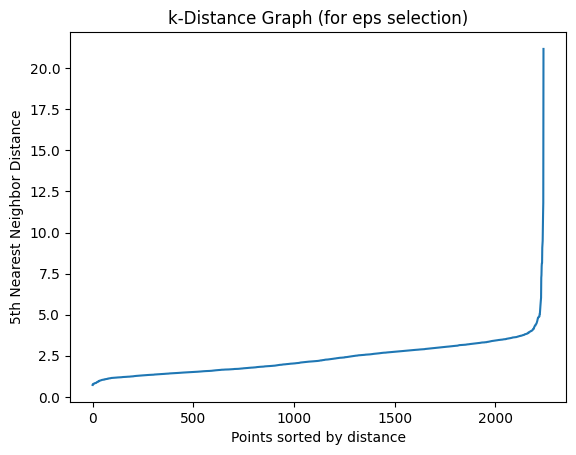

In [55]:
from sklearn.neighbors import NearestNeighbors

# Find the optimal eps
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(df_scaled)
distances, indices = neighbors.kneighbors(df_scaled)

# Sort distances to plot
distances = np.sort(distances[:, 4])  # 4th column (k=5)
plt.plot(distances)
plt.title('k-Distance Graph (for eps selection)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()


In [59]:
# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5) 
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Check cluster labels
print(df['DBSCAN_Cluster'].value_counts())

# Inspect unique labels (-1 represents noise)
print("Unique clusters:", df['DBSCAN_Cluster'].unique())

DBSCAN_Cluster
 0    1871
-1     354
 2       5
 4       5
 3       4
 1       1
Name: count, dtype: int64
Unique clusters: [-1  0  1  2  3  4]


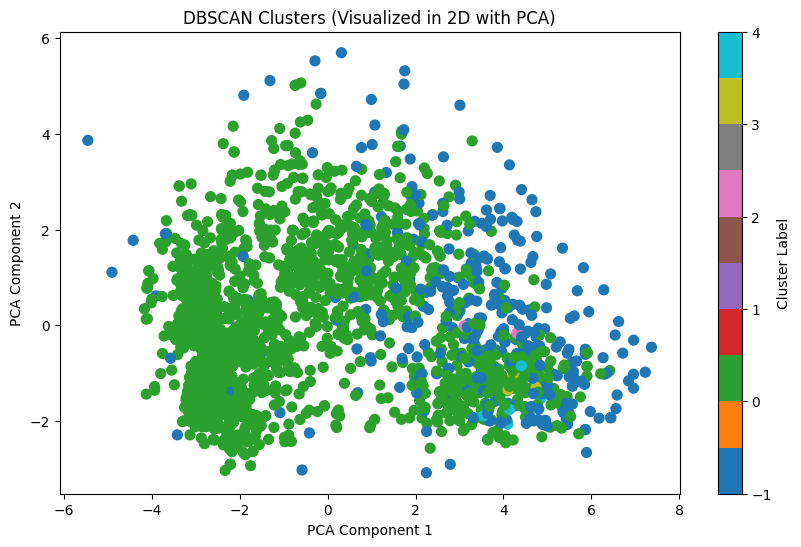

In [60]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA components to your DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['DBSCAN_Cluster'], cmap='tab10', s=50)
plt.title('DBSCAN Clusters (Visualized in 2D with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Gaussian Mixture Models (GMM)

A probabilistic clustering technique that assumes data points come from a mixture of several Gaussian (normal) distributions.

It’s more flexible than K-Means since it allows soft clustering, meaning each customer can belong to clusters with certain probabilities.

#### Gaussian Mixture Clustering

In [61]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_scaled)

# Check cluster distribution
print(df['GMM_Cluster'].value_counts())

# Optional: See cluster probabilities
probs = gmm.predict_proba(df_scaled)
probs_df = pd.DataFrame(probs, columns=[f'Cluster_{i}_Prob' for i in range(3)])
df = pd.concat([df, probs_df], axis=1)

GMM_Cluster
0    1050
1     597
2     593
Name: count, dtype: int64


#### Visualize GMM Clusters with PCA

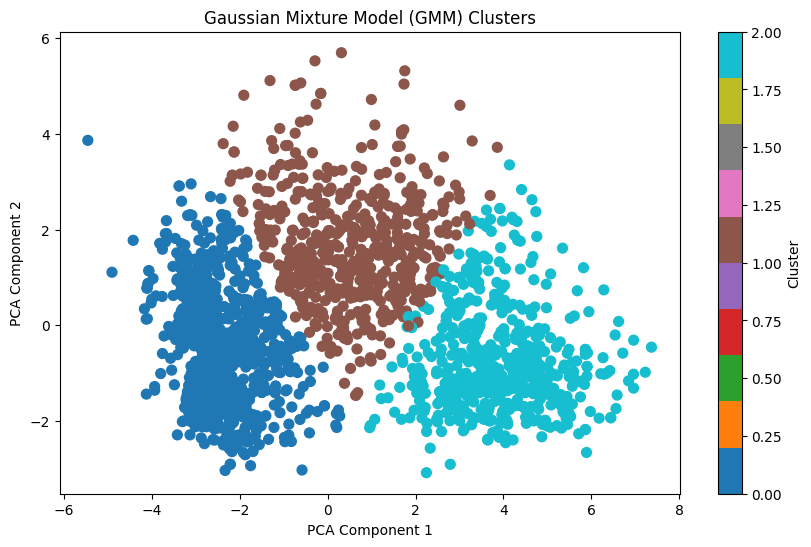

In [62]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['GMM_Cluster'], cmap='tab10', s=50)
plt.title('Gaussian Mixture Model (GMM) Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
